<a href="https://colab.research.google.com/github/ducpham1612/coderschoolfinalproject1612/blob/main/finalproject_phamchiduc_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.graph_objects as go

plt.style.use("seaborn")


<ipython-input-1-6afd0318757b>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
#import data
df = pd.read_csv('https://raw.githubusercontent.com/ducpham1612/coderschoolfinalproject1612/main/vgchartz-2024.csv')
df1 = pd.read_csv('https://raw.github.com/ducpham1612/coderschoolfinalproject1612/main/Activision%20Blizzard.csv')

In [ ]:
df

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


In [ ]:
#cleaning img and Nan Sales data
#drop img collumns
df = df.drop(columns=['img'])
#drop last update
df = df.drop(columns=['last_update'])
df['release_date']= pd.to_datetime(df['release_date'])
df['year']= df['release_date'].dt.year
#df.dropna(subset=['total_sales','na_sales','jp_sales','pal_sales','other_sales'],inplace = True)

In [ ]:
df['year'] = df['year'].fillna(0)
df['year'] = df['year'].astype('int')

In [ ]:
df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,year
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2014
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,2002
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,2013
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2016
64012,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020
64013,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020
64014,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019


In [ ]:
import plotly.graph_objects as go

# Group by year and sum up the regional sales
sales_per_year = df.groupby('year')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

#bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=sales_per_year.index,
    y=sales_per_year['na_sales'],
    name='NA Sales',
    marker_color='rgb(49,130,189)'
))
fig.add_trace(go.Bar(
    x=sales_per_year.index,
    y=sales_per_year['jp_sales'],
    name='JP Sales',
    marker_color='rgb(0,204,0)'
))
fig.add_trace(go.Bar(
    x=sales_per_year.index,
    y=sales_per_year['pal_sales'],
    name='PAL Sales',
    marker_color='rgb(255,153,51)'
))
fig.add_trace(go.Bar(
    x=sales_per_year.index,
    y=sales_per_year['other_sales'],
    name='Other Sales',
    marker_color='rgb(171,50,96)'
))

# Update the layout
fig.update_layout(
    barmode='stack',
    title={
        'text': 'Regional Sales Per Year',
        'x': 0.5,  # Center the title
        'xanchor': 'center'
    },
    xaxis=dict(title='Year', range=[1990, 2020], tickmode='linear', dtick=1),
    yaxis=dict(title='Sales (in millions)'),
    legend=dict(title='Region'),
    width=1000,
    height=600
)

# Show the plot
fig.show()

In [ ]:
sales_per_year

,na_sales,jp_sales,pal_sales,other_sales
year,,,,
0,0.76,2.95,2.19,0.61
1971,0.00,0.00,0.00,0.00
1973,0.00,0.00,0.00,0.00
1975,0.00,0.00,0.00,0.00
1977,2.34,0.00,0.14,0.02
1978,2.20,0.00,0.14,0.00
1979,0.29,0.00,0.02,0.00
1980,2.11,0.00,0.13,0.02
1981,7.21,0.00,0.45,0.08


Summary of Sales Data Insights (1985-2020)

Key Observations:

- 1985-1990:

North America (NA): Dominated early sales, peaking at 3.38M units in 1989.

Japan (JP): Consistent growth, significant in the early years.

- 1991-2000:

 Growth Surge: Significant rise across all regions, peaking in 2000.

 NA & JP: Major markets, NA reached 31.82M units in 2000, JP at 11.48M.

- 2001-2006:

 NA Dominance: Continued lead, 48.03M units in 2002.

 Dip and Recovery: Sales dipped in 2004, then recovered by 2005.

- 2007-2010:

 Peak Sales: Major boom, NA peaked at 109.13M units in 2010.

 PAL Growth: Significant rise, 69.47M units in 2010.

- 2011-2018:

 Decline: Gradual decrease across all regions post-2010.

 NA & PAL: Major declines, NA dropped to 27.65M units in 2018.

- 2019-2020:

 Sharp Drop: Minimal sales in 2020, likely due to market shifts and external factors like the pandemic.

- Regional Insights:
 North America (NA): Largest market overall, significant post-2010 decline.

 Japan (JP): Stable but lower growth, peaks in 1996 and 2010.

 Europe (PAL): Steady growth, aligned with global peaks.

 Other Regions: Smallest segment but showed similar growth patterns.

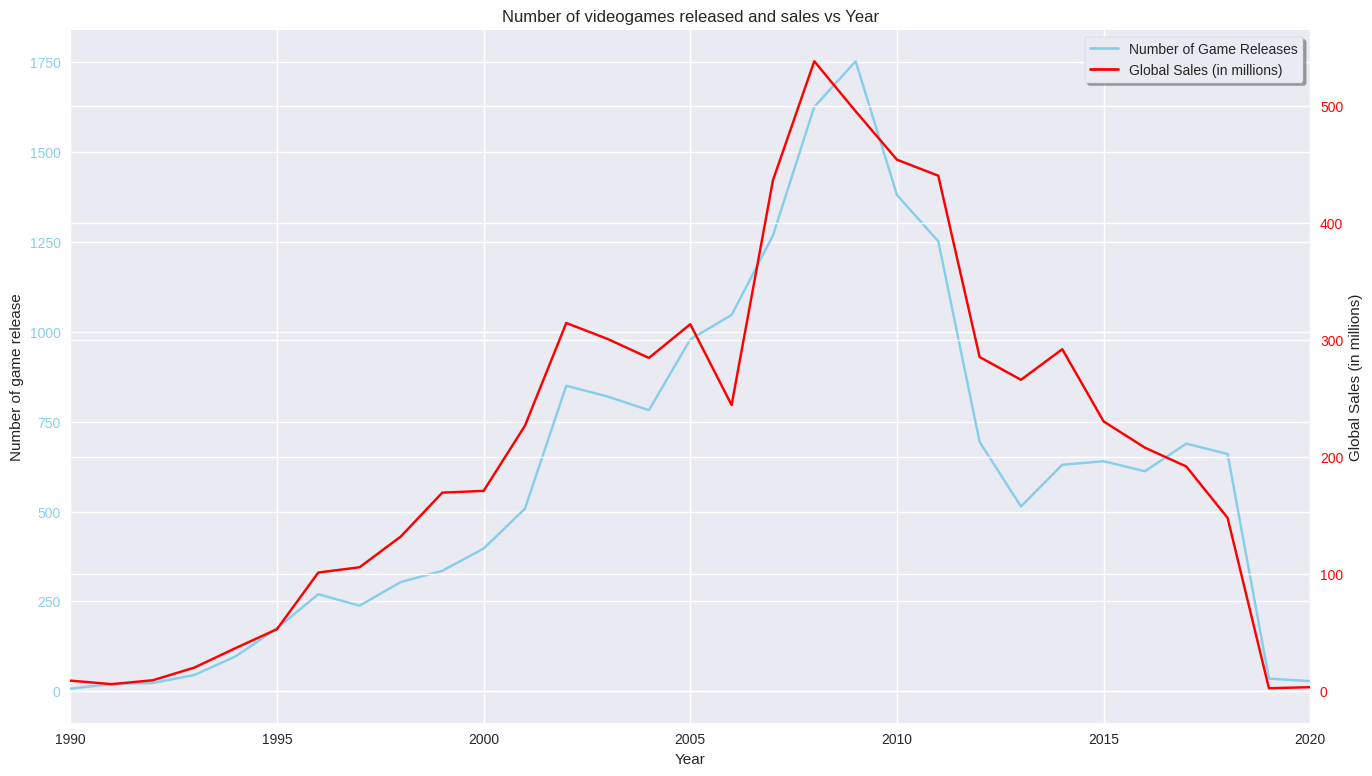

In [ ]:
# create sorted list of unique 'year' value
yearlist = sorted(df['year'].unique())
#create fig and ax
fig, ax1 = plt.subplots()
#set size
fig.set_size_inches(16,9)
#count total of game release each year
release_count_year = df.groupby('year').count()
line1, = ax1.plot(yearlist, release_count_year['total_sales'], color='skyblue')
#set labels and format
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of game release')
ax1.set_title('Number of videogames released and sales vs Year')
ax1.tick_params(axis='y', labelcolor='skyblue')
# set y lim
ax1.set_xlim([1990, 2020])
#ax1.set_ylim([0, 250])
# find global sales each year
global_sales_year = df.groupby('year')['total_sales'].sum()
ax2 = ax1.twinx()
line2, = ax2.plot(yearlist, global_sales_year, color='red')
ax2.set_ylabel('Global Sales (in millions)')
ax2.tick_params(axis='y',labelcolor = 'red')
#ax2.set_ylim(0,250)

# Add legends with colored boxes
lines = [line1, line2]
labels = ['Number of Game Releases', 'Global Sales (in millions)']
colors = ['skyblue', 'red']
legend_handles = [plt.Line2D([0], [0], color=color, lw=2) for color in colors]

# Create the legend with the custom handles
ax1.legend(legend_handles, labels, loc='upper right', frameon=True, fancybox=True, shadow=True)

# Show the plot
plt.show()

In [ ]:
salesale = pd.concat([global_sales_year,release_count_year])
salesale

,0,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
year,,,,,,,,,,,,,
0,6.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,NaN,1452.0,1452.0,1452.0,1452.0,1452.0,13.0,28.0,4.0,16.0,13.0,15.0,1452.0
2021,NaN,422.0,422.0,422.0,422.0,422.0,2.0,0.0,0.0,0.0,0.0,0.0,422.0
2022,NaN,168.0,168.0,168.0,168.0,168.0,2.0,0.0,0.0,0.0,0.0,0.0,168.0


In [ ]:
sales_per_platform = df[df['year'] > 2008].groupby('console')['total_sales'].sum().sort_values(ascending=False)
sales_per_platform.reset_index()


,console,total_sales
0,PS3,663.89
1,X360,622.20
2,PS4,539.92
3,XOne,268.96
4,Wii,268.44
5,DS,189.97
6,PC,99.25
7,3DS,99.24
8,PSP,90.85
9,PSV,62.98


In [ ]:
top_platforms_total_sales

2363.4100000000003

In [ ]:
top_platforms['Other']

654.3299999999995

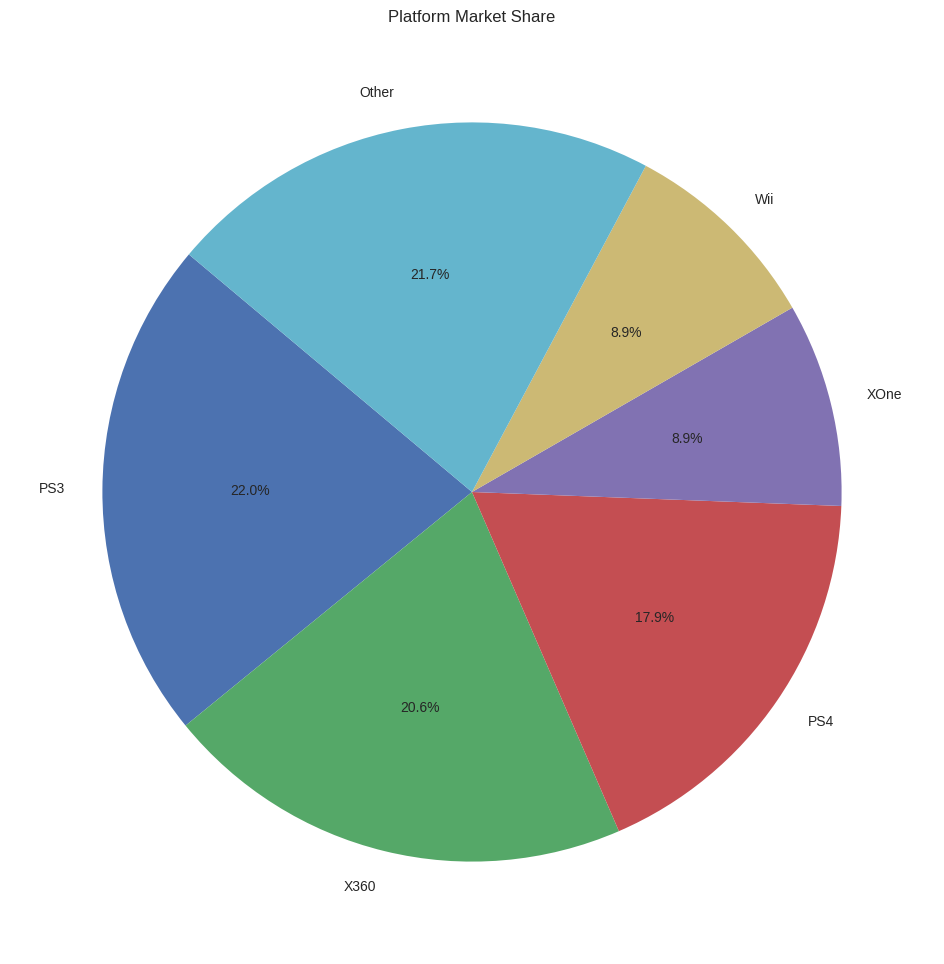

In [ ]:
#Sort the platforms by total sales and get the top 6
top_platforms = sales_per_platform.sort_values(ascending=False).head(5)

# Calculate the total sales of the top 6 platforms
top_platforms_total_sales = top_platforms.sum()

# Create a new dataframe with the top 6 platforms and 'Other'
top_platforms['Other'] = sales_per_platform.sort_values(ascending=False).sum() - top_platforms_total_sales

# Plot the pie chart
plt.figure(figsize=(12, 12))
top_platforms.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Platform Market Share')
plt.ylabel('')
plt.show()

Top Consoles:

 -PlayStation 3 (PS3) leads with 570.34 million total sales, followed closely by the Xbox 360 (X360) at 525.69 million sales.

 -PlayStation 4 (PS4) also shows strong performance with 422.11 million sales.

 -The PlayStation 2 (PS2) remains popular with 371.64 million sales despite being an older console.

Handheld Consoles:

 -The Nintendo DS (DS) stands out among handhelds with 88.39 million sales.

 -Other notable handhelds include the PlayStation Portable (PSP) with 80.02 million sales and the Game Boy Advance (GBA) with 44.11 million sales.

In [ ]:
sales_platform_per_region = df[df['year']>2008].groupby('console')[['na_sales','jp_sales','pal_sales', 'other_sales','total_sales']].sum().sort_values(by='total_sales', ascending = False).head(20)

#bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    x=sales_platform_per_region.index,
    y=sales_platform_per_region['na_sales'],
    name='NA Sales',
    marker_color='rgb(49,130,189)'
))
fig.add_trace(go.Bar(
    x=sales_platform_per_region.index,
    y=sales_platform_per_region['jp_sales'],
    name='JP Sales',
    marker_color='rgb(0,204,0)'
))
fig.add_trace(go.Bar(
    x=sales_platform_per_region.index,
    y=sales_platform_per_region['pal_sales'],
    name='PAL Sales',
    marker_color='rgb(255,153,51)'
))
fig.add_trace(go.Bar(
    x=sales_platform_per_region.index,
    y=sales_platform_per_region['other_sales'],
    name='Other Sales',
    marker_color='rgb(171,50,96)'
))

# Update the layout
fig.update_layout(
    barmode='stack',
    title={
        'text': 'Platform Sales After 2008',
        'x': 0.5,  # Center the title
        'xanchor': 'center'
    },
    xaxis=dict(title='PlatForm', tickmode='linear', dtick=1),
    yaxis=dict(title='Sales (in millions)'),
    legend=dict(title='Region'),
    width=1000,
    height=600
)

# Show the plot
fig.show()

In [ ]:
jp_platform_per_region = df[df['year']>2008].groupby('console')[['jp_sales']].sum().sort_values(by='jp_sales', ascending = False).head(20)
jp_platform_per_region

,jp_sales
console,
PS3,60.46
3DS,41.71
PSP,39.19
PS4,30.69
PSV,26.91
DS,25.35
Wii,12.36
X360,6.87
NS,4.23


PlayStation consoles (PS3, PS2, PS4) consistently perform well across all regions, highlighting their global popularity.

Xbox 360 (X360) shows exceptional performance in North America and
Europe but less so in Japan.

Handheld consoles like the Nintendo DS (DS) and PlayStation Portable
(PSP) have strong sales in Japan and a notable presence globally.

Nintendo's home consoles (Wii, GameCube) also show robust sales, especially in North America and Europe.

In [ ]:
#Finding out current 7th gen game release per year and game sales per year for 7th gen
#data frame with wii
wii_df = df[df['console'] =='Wii']
wii_df.name = 'wii_df'
#data frame with Ps3
PS3_df = df[df['console'] =='PS3']
PS3_df.name = 'ps3_df'
PS4_df = df[df['console'] =='PS4']
PS4_df.name = 'ps4_df'
#data frame with Xbox360
X360_df = df[df['console'] =='X360']
X360_df.name = 'x360_df'
XOne_df = df[df['console'] =='XOne']
XOne_df.name = 'xone_df'
WiiU_df = df[df['console'] =='WiiU']
WiiU_df.name = 'wiiu_df'

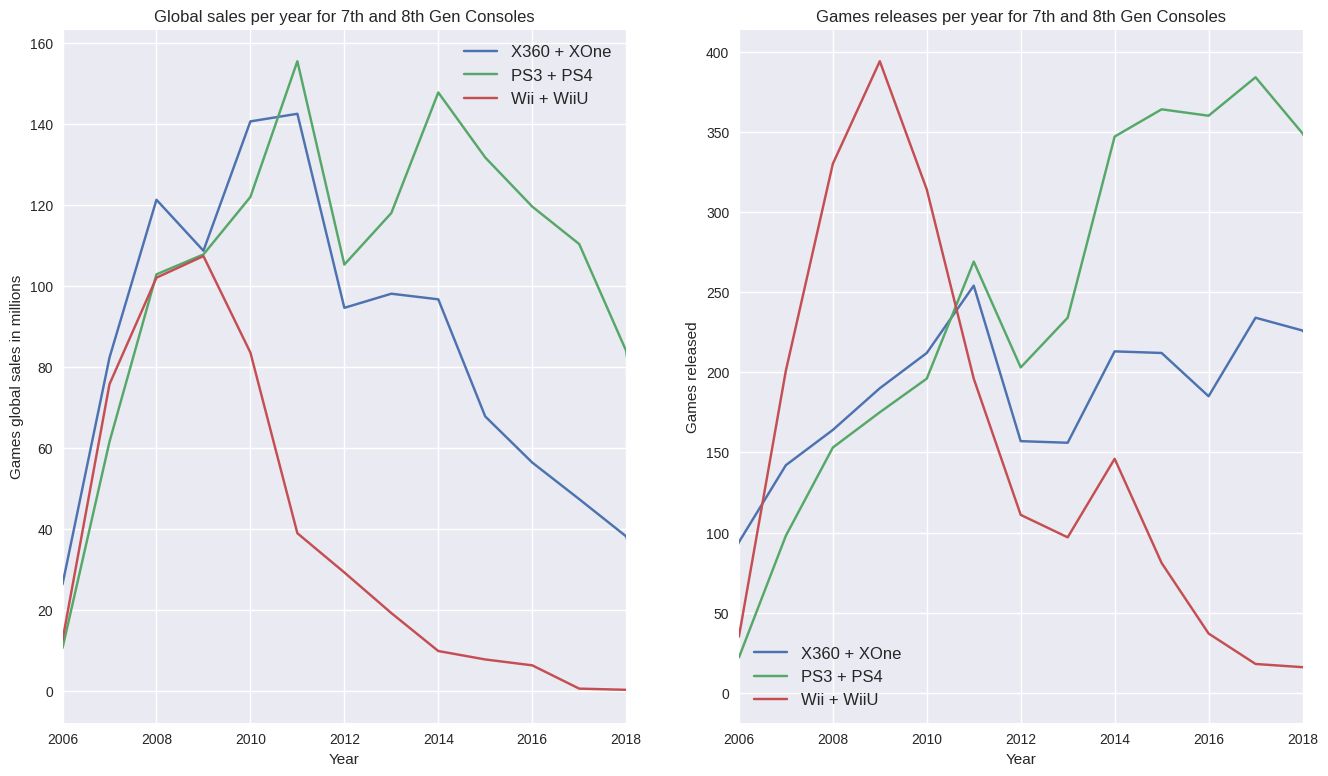

In [ ]:
# Combining the data for each console pair
xbox_df = pd.concat([X360_df, XOne_df])
playstation_df = pd.concat([PS3_df, PS4_df])
wii_df = pd.concat([wii_df, WiiU_df])

# Grouping by year to get total sales and releases
xbox_sales = xbox_df.groupby(xbox_df['release_date'].dt.year)['total_sales'].sum()
xbox_releases = xbox_df.groupby(xbox_df['release_date'].dt.year)['title'].count()

playstation_sales = playstation_df.groupby(playstation_df['release_date'].dt.year)['total_sales'].sum()
playstation_releases = playstation_df.groupby(playstation_df['release_date'].dt.year)['title'].count()

wii_sales = wii_df.groupby(wii_df['release_date'].dt.year)['total_sales'].sum()
wii_releases = wii_df.groupby(wii_df['release_date'].dt.year)['title'].count()

# Start plotting for combined console data
fig, ax = plt.subplots(1, 2)
# Set figure size
fig.set_size_inches(16, 9)

# Plots global sales by year
ax[0].plot(xbox_sales, label='X360 + XOne')
ax[0].plot(playstation_sales, label='PS3 + PS4')
ax[0].plot(wii_sales, label='Wii + WiiU')

# Set x and y limits
#ax[0].set_ylim(0, 130)
ax[0].set_xlim(2006, 2018)

# Set legend
ax[0].legend(prop={'size': 12})

# Set labels
ax[0].set_title('Global sales per year for 7th and 8th Gen Consoles')
ax[0].set_ylabel('Games global sales in millions')
ax[0].set_xlabel('Year')

# Plot number of game releases by year for combined consoles
ax[1].plot(xbox_releases, label='X360 + XOne')
ax[1].plot(playstation_releases, label='PS3 + PS4')
ax[1].plot(wii_releases, label='Wii + WiiU')

# Set x and y limits
#ax[1].set_ylim(0, 80)
ax[1].set_xlim(2006, 2018)

# Set legend
ax[1].legend(prop={'size': 12})

# Set labels
ax[1].set_title('Games releases per year for 7th and 8th Gen Consoles')
ax[1].set_ylabel('Games released')
ax[1].set_xlabel('Year')

plt.show()


In [ ]:
consoles_sales = pd.concat([xbox_sales])
consoles_sales

release_date
2005.0      7.17
2006.0     26.41
2007.0     82.34
2008.0    121.29
2009.0    108.71
2010.0    140.63
2011.0    142.51
2012.0     94.62
2013.0     98.10
2014.0     96.72
2015.0     67.81
2016.0     56.44
2017.0     47.41
2018.0     38.21
2019.0      0.00
2020.0      0.00
2021.0      0.00
2022.0      0.00
2023.0      0.00
2024.0      0.00
Name: total_sales, dtype: float64

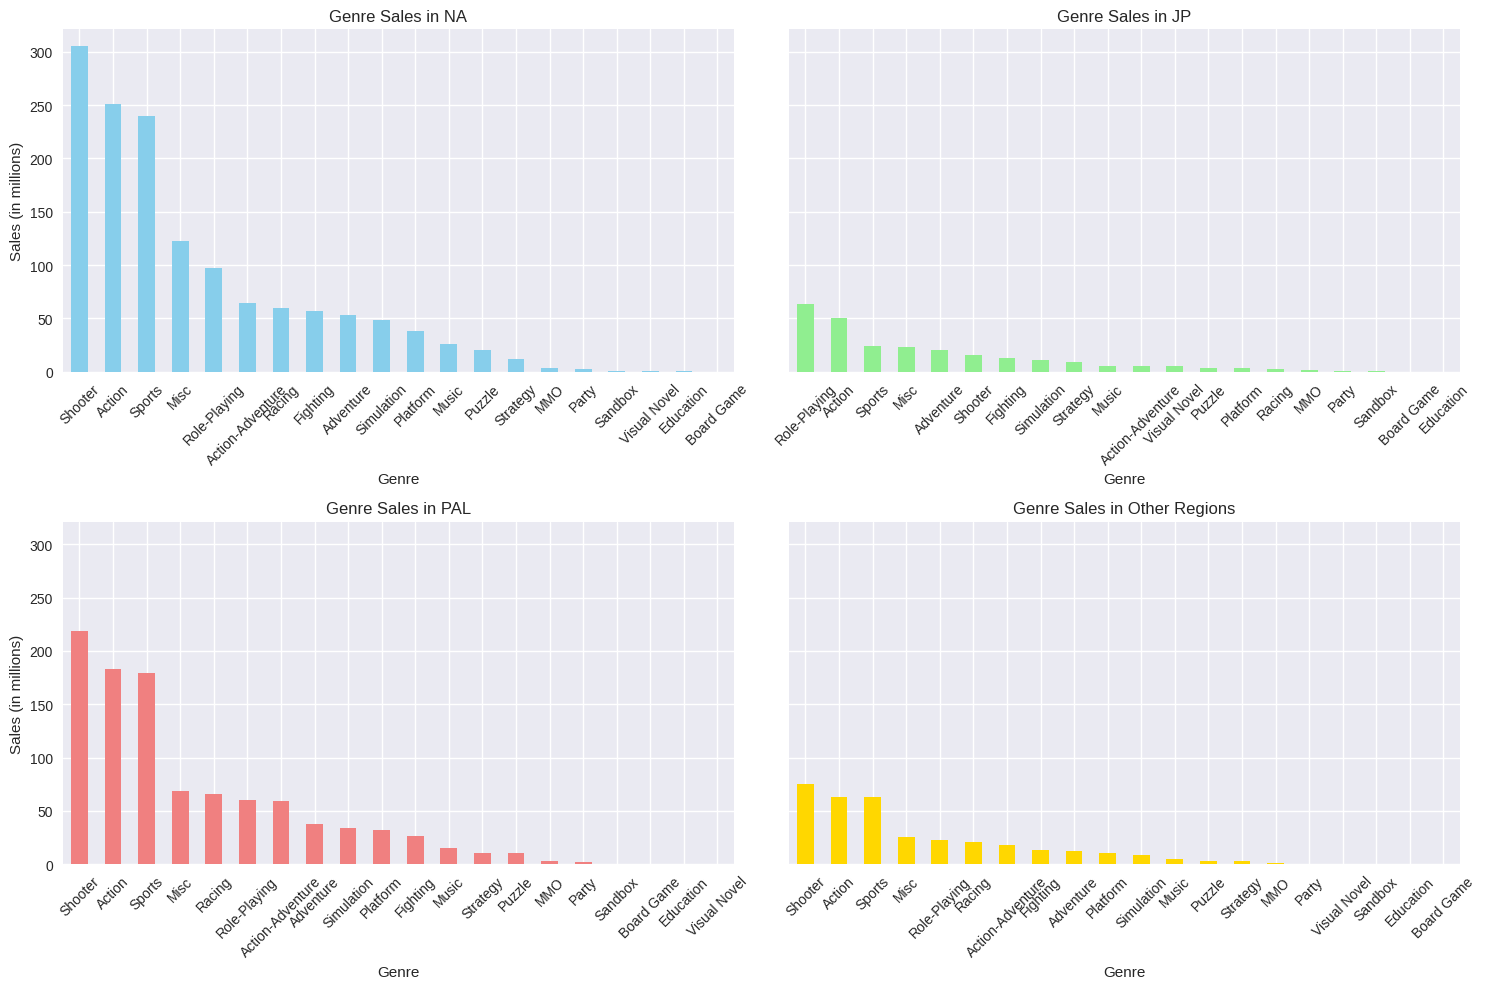

In [ ]:
na_sales_genre =  df[df['year'] > 2008].groupby('genre')['na_sales'].sum()
jp_sales_genre = df[df['year'] > 2008].groupby('genre')['jp_sales'].sum()
pal_sales_genre = df[df['year'] > 2008].groupby('genre')['pal_sales'].sum()
other_sales_genre = df[df['year'] > 2008].groupby('genre')['other_sales'].sum()

# Sort genres by total sales in each region
top_na_genres = na_sales_genre.sort_values(ascending=False)
top_jp_genres = jp_sales_genre.sort_values(ascending=False)
top_pal_genres = pal_sales_genre.sort_values(ascending=False)
top_other_genres = other_sales_genre.sort_values(ascending=False)

# Plot the bar charts
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)

top_na_genres.plot(kind='bar', ax=axes[0, 0], color='skyblue', title='Genre Sales in NA')
axes[0, 0].set_xlabel('Genre')
axes[0, 0].set_ylabel('Sales (in millions)')
axes[0, 0].tick_params(axis='x', rotation=45)

top_jp_genres.plot(kind='bar', ax=axes[0, 1], color='lightgreen', title='Genre Sales in JP')
axes[0, 1].set_xlabel('Genre')
axes[0, 1].set_ylabel('Sales (in millions)')
axes[0, 1].tick_params(axis='x', rotation=45)

top_pal_genres.plot(kind='bar', ax=axes[1, 0], color='lightcoral', title='Genre Sales in PAL')
axes[1, 0].set_xlabel('Genre')
axes[1, 0].set_ylabel('Sales (in millions)')
axes[1, 0].tick_params(axis='x', rotation=45)

top_other_genres.plot(kind='bar', ax=axes[1, 1], color='gold', title='Genre Sales in Other Regions')
axes[1, 1].set_xlabel('Genre')
axes[1, 1].set_ylabel('Sales (in millions)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-50-9e77df1ff448>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-9e77df1ff448>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-9e77df1ff448>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



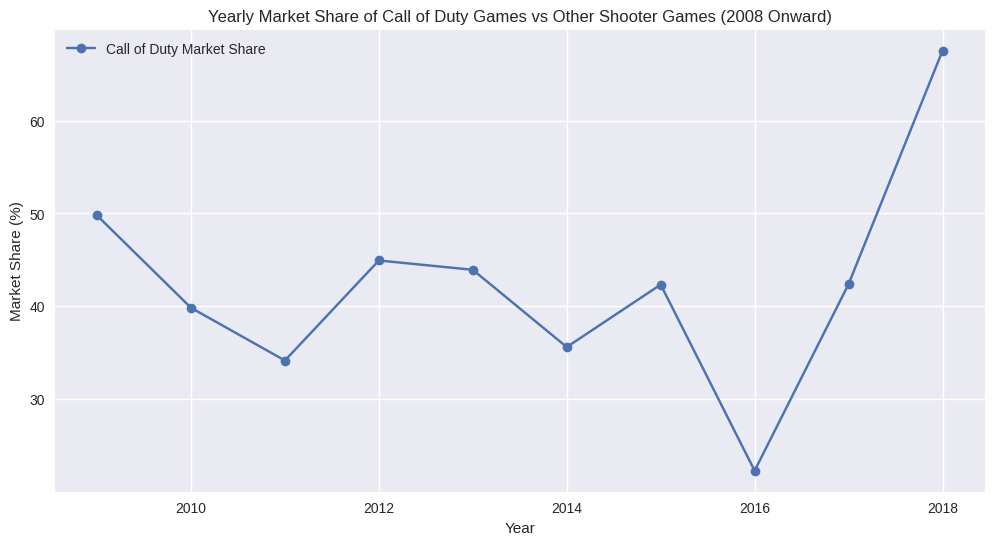

In [ ]:
///////////shooter_games_df = df[df['genre'] == 'Shooter']

# Adding a column to identify Call of Duty games
shooter_games_df['is_cod'] = shooter_games_df['title'].str.contains('Call of Duty')

# Aggregating sales data for Call of Duty games and other shooter games by year
shooter_games_df['release_date'] = pd.to_datetime(shooter_games_df['release_date'], errors='coerce')
shooter_games_df['year'] = shooter_games_df['release_date'].dt.year

# Aggregating total sales by year for Call of Duty and other shooter games
yearly_sales_cod = shooter_games_df[shooter_games_df['is_cod']].groupby('year')['total_sales'].sum().reset_index(name='cod_sales')
yearly_sales_other_shooters = shooter_games_df[~shooter_games_df['is_cod']].groupby('year')['total_sales'].sum().reset_index(name='other_shooter_sales')

# Merging the dataframe
yearly_sales_shooters = pd.merge(yearly_sales_cod, yearly_sales_other_shooters, on='year', how='outer').fillna(0)

# Calculating the market share of Call of Duty games compared to other shooter games
yearly_sales_shooters['total_sales'] = yearly_sales_shooters['cod_sales'] + yearly_sales_shooters['other_shooter_sales']
yearly_sales_shooters['cod_market_share'] = yearly_sales_shooters['cod_sales'] / yearly_sales_shooters['total_sales'] * 100
yearly_sales_shooters['other_shooter_market_share'] = yearly_sales_shooters['other_shooter_sales'] / yearly_sales_shooters['total_sales'] * 100

# Filtering the yearly_sales_shooters dataframe for entries from 2008 onward
yearly_sales_shooters_2008 = yearly_sales_shooters[yearly_sales_shooters['year'] > 2008]

# Plotting the market share over time from 2008 onwards
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales_shooters_2008['year'], yearly_sales_shooters_2008['cod_market_share'], marker='o', label='Call of Duty Market Share')
#plt.plot(yearly_sales_shooters_2008['year'], yearly_sales_shooters_2008['other_shooter_market_share'], marker='o', label='Other Shooter Games Market Share')
plt.title('Yearly Market Share of Call of Duty Games vs Other Shooter Games (2008 Onward)')
plt.xlabel('Year')
plt.ylabel('Market Share (%)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
yearly_sales_shooters_2008

,year,cod_sales,other_shooter_sales,total_sales,cod_market_share,other_shooter_market_share
6,2009.0,26.94,27.17,54.11,49.787470,50.212530
7,2010.0,31.05,46.90,77.95,39.833226,60.166774
8,2011.0,30.97,59.72,90.69,34.149300,65.850700
9,2012.0,31.30,38.36,69.66,44.932529,55.067471
10,2013.0,28.80,36.76,65.56,43.929225,56.070775
11,2014.0,21.78,39.40,61.18,35.599869,64.400131
12,2015.0,26.72,36.40,63.12,42.332066,57.667934
13,2016.0,13.89,48.49,62.38,22.266752,77.733248
14,2017.0,20.64,28.06,48.70,42.381930,57.618070
15,2018.0,14.30,6.87,21.17,67.548418,32.451582


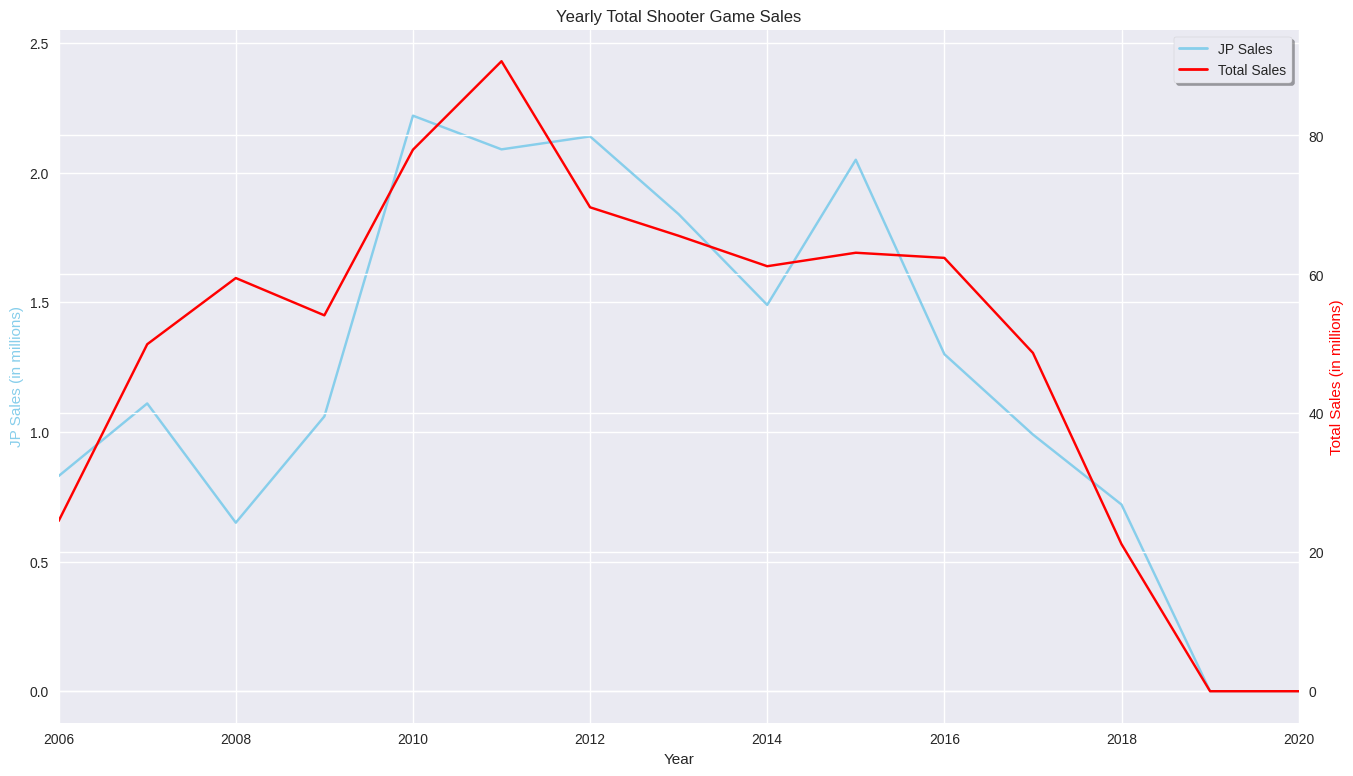

In [ ]:
#yearly jap shooter game sales
shooter = df[df['genre']=='Shooter']
yearly_jap_shooter = shooter.groupby('year')['jp_sales'].sum().reset_index()
#yearly sales
yearly_shooter = shooter.groupby('year')['total_sales'].sum().reset_index()
# First subplot: Yearly JP shooter game sales
#create fig and ax
fig, ax1 = plt.subplots()
#set size
fig.set_size_inches(16,9)

line1, = ax1.plot(yearly_jap_shooter['year'], yearly_jap_shooter['jp_sales'],color='skyblue')
ax1.set_ylabel('JP Sales (in millions)',color='skyblue')
ax1.set_xlabel('Year')
ax1.set_xlim(2006, 2020)
# Second subplot: Yearly total shooter game sales
ax2 = ax1.twinx()
line2, = ax2.plot(yearly_shooter['year'], yearly_shooter['total_sales'],color='red')
ax2.set_title('Yearly Total Shooter Game Sales')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Sales (in millions)',color = 'red')

# Add legends with colored boxes
lines = [line1, line2]
labels = ['JP Sales', 'Total Sales']
colors = ['skyblue', 'red']
legend_handles = [plt.Line2D([0], [0], color=color, lw=2) for color in colors]

# Create the legend with the custom handles
ax1.legend(legend_handles, labels, loc='upper right', frameon=True, fancybox=True, shadow=True)

# Show the plots
plt.show()

The comparison between Japanese sales (jp_sales) and total sales (total_sales) shows some interesting similarities:

Following the Same Path: Over the years, both Japanese sales and total sales seem to move in similar directions. They rise and fall together, showing a kind of harmony in their trends.

Big Moments: There are certain years where sales spike for both Japanese and total sales. These might be times when something big happened in the market or when a popular product was released.

It's possible that the release of the Wii and other Nintendo products could have influenced sales trends in the shooter genre. The Wii, known for its motion-controlled gaming and family-friendly titles, targeted a different audience compared to traditional shooter games, which are often geared towards more hardcore gamers.

When a new gaming console or platform is introduced, it can shift consumer preferences and spending habits within the gaming market. In the case of the Wii, its innovative gameplay and focus on casual gaming experiences may have drawn attention away from traditional shooter games during its peak popularity.

In [ ]:
cod_activision = df[(df['publisher'] == 'Activision') & (df['title'].str.contains('Call of Duty'))]

# Group the data by release year to count the number of Call of Duty game releases each year
cod_releases = cod_activision.groupby('year')['title'].count().reset_index()
cod_releases.columns = ['Year', 'Number of Releases']

# Group the data by release year to sum the total sales of Call of Duty games globally each year
cod_sales = cod_activision.groupby('year')['total_sales'].sum().reset_index()

cod_sales.rename(columns={'year': 'Year'}, inplace=True)

# Merge the release count and total sales DataFrames on release year
cod_data = cod_releases.merge(cod_sales, on='Year', how='outer').fillna(0)

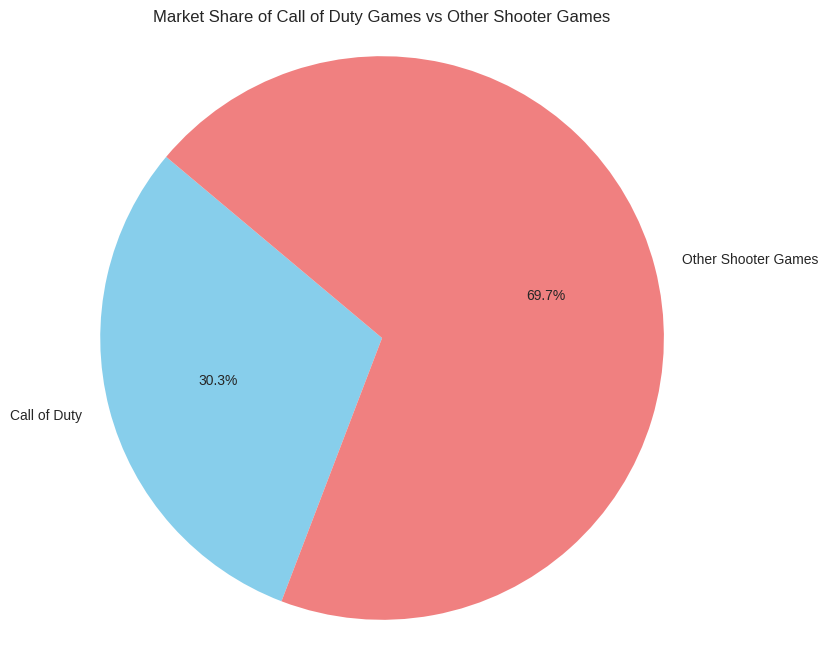

In [ ]:
cod_total_sales = cod_activision['total_sales'].sum()

# Filter the dataset to include other shooter games (excluding Call of Duty)
other_shooter_games = df[(df['genre'] == 'Shooter') & (~df['title'].str.contains('Call of Duty'))]

# Calculate total sales of other shooter games
other_shooter_total_sales = other_shooter_games['total_sales'].sum()

# Calculate the market share percentage of Call of Duty games
cod_market_share = cod_total_sales / (cod_total_sales + other_shooter_total_sales) * 100

# Calculate the market share percentage of other shooter games
other_shooter_market_share = other_shooter_total_sales / (cod_total_sales + other_shooter_total_sales) * 100

# Plot the pie chart
labels = ['Call of Duty', 'Other Shooter Games']
sizes = [cod_market_share, other_shooter_market_share]
colors = ['skyblue', 'lightcoral']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Market Share of Call of Duty Games vs Other Shooter Games')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
cod_activision = df[(df['publisher'] == 'Activision') & (df['year'] > 2008) & (df['title'].str.contains('Call of Duty'))]

# Split the platforms and count the number of releases for each platform
platform_counts = cod_activision['console'].str.split(', ').explode().value_counts().reset_index()
platform_counts.columns = ['console', 'Number of Releases']

# Create the pie chart
fig = go.Figure(go.Pie(
    labels=platform_counts['console'],
    values=platform_counts['Number of Releases'],
    hoverinfo='label+percent',
    textinfo='label+value+percent',
    textfont_size=15
))

# Update the layout
fig.update_layout(
    title={
        'text': 'Call of Duty Game Releases by Platform',
        'x': 0.5,  # Center the title
        'xanchor': 'center'
    },
    width=800,
    height=800
)

# Show the plot
fig.show()

In [ ]:
df['genre'].value_counts()

genre
Misc                9304
Action              8557
Adventure           6260
Role-Playing        5721
Sports              5586
Shooter             5410
Platform            4001
Strategy            3685
Puzzle              3521
Racing              3425
Simulation          3158
Fighting            2367
Action-Adventure    1877
Visual Novel         493
Music                297
Party                151
MMO                  115
Education             35
Board Game            33
Sandbox               20
Name: count, dtype: int64

In [ ]:
# Filter the data for the time period 2008 to 2018
filtered_df = df[(df['release_date'].dt.year > 2008) & (df['release_date'].dt.year <= 2018)]

# Filter the data for Call of Duty games
cod_df = filtered_df[filtered_df['title'].str.contains('Call of Duty')]

# Filter the data for the 5 genre
shooter_df = filtered_df[filtered_df['genre'] == 'Shooter']
roleplay_df = filtered_df[filtered_df['genre'] == 'Role-Playing']
action_df = filtered_df[filtered_df['genre'] == 'Action']
sport_df = filtered_df[filtered_df['genre'] == 'Sports']
misc_df = filtered_df[filtered_df['genre'] == 'Misc']
# Group by year and sum the jp_sales for each category
cod_sales_per_year = cod_df.groupby(cod_df['release_date'].dt.year)['jp_sales'].sum()
shooter_sales_per_year = shooter_df.groupby(shooter_df['release_date'].dt.year)['jp_sales'].sum()
roleplay_sales_per_year = roleplay_df.groupby(roleplay_df['release_date'].dt.year)['jp_sales'].sum()
sport_sales_per_year = sport_df.groupby(sport_df['release_date'].dt.year)['jp_sales'].sum()
misc_sales_per_year = misc_df.groupby(misc_df['release_date'].dt.year)['jp_sales'].sum()
action_sales_per_year = action_df.groupby(action_df['release_date'].dt.year)['jp_sales'].sum()


# Calculate the total jp_sales per year for all games
total_sales_per_year = filtered_df.groupby(filtered_df['release_date'].dt.year)['jp_sales'].sum()

# Calculate the market share for each category by year
cod_market_share = (cod_sales_per_year / total_sales_per_year) * 100
shooter_market_share = (shooter_sales_per_year / total_sales_per_year) * 100
roleplay_genre_market_share = (roleplay_sales_per_year / total_sales_per_year) * 100
sport_genre_market_share = (sport_sales_per_year / total_sales_per_year) * 100
action_genre_market_share = (action_sales_per_year / total_sales_per_year) * 100
misc_genre_market_share = (misc_sales_per_year / total_sales_per_year) * 100

import plotly.graph_objects as go

# Plot the market share trends using Plotly
fig = go.Figure()

# Add traces for each category
fig.add_trace(go.Scatter(x=cod_market_share.index, y=cod_market_share, mode='lines+markers', name='Call of Duty',line=dict(color='darkblue')))
fig.add_trace(go.Scatter(x=shooter_market_share.index, y=shooter_market_share, mode='lines+markers', name='Shooter Genre',line=dict(color='lightblue')))
fig.add_trace(go.Scatter(x=roleplay_genre_market_share.index, y=roleplay_genre_market_share, mode='lines+markers', name='Role-Playing Genre',line=dict(color='lightgreen')))
fig.add_trace(go.Scatter(x=action_genre_market_share.index, y=action_genre_market_share, mode='lines+markers', name='Action Genre',line=dict(color='gray',)))
fig.add_trace(go.Scatter(x=sport_genre_market_share.index, y=sport_genre_market_share, mode='lines+markers', name='Sport Genre'))

# Update layout
fig.update_layout(
    title='Yearly Market Share of Call of Duty, Shooter Genre, and Most Popular Genre in Japan (2008-2018)',
    xaxis_title='Year',
    yaxis_title='Market Share (%)',
    legend=dict(font=dict(size=12)),
    width=1200,
    height=800
)

# Show the plot
fig.show()

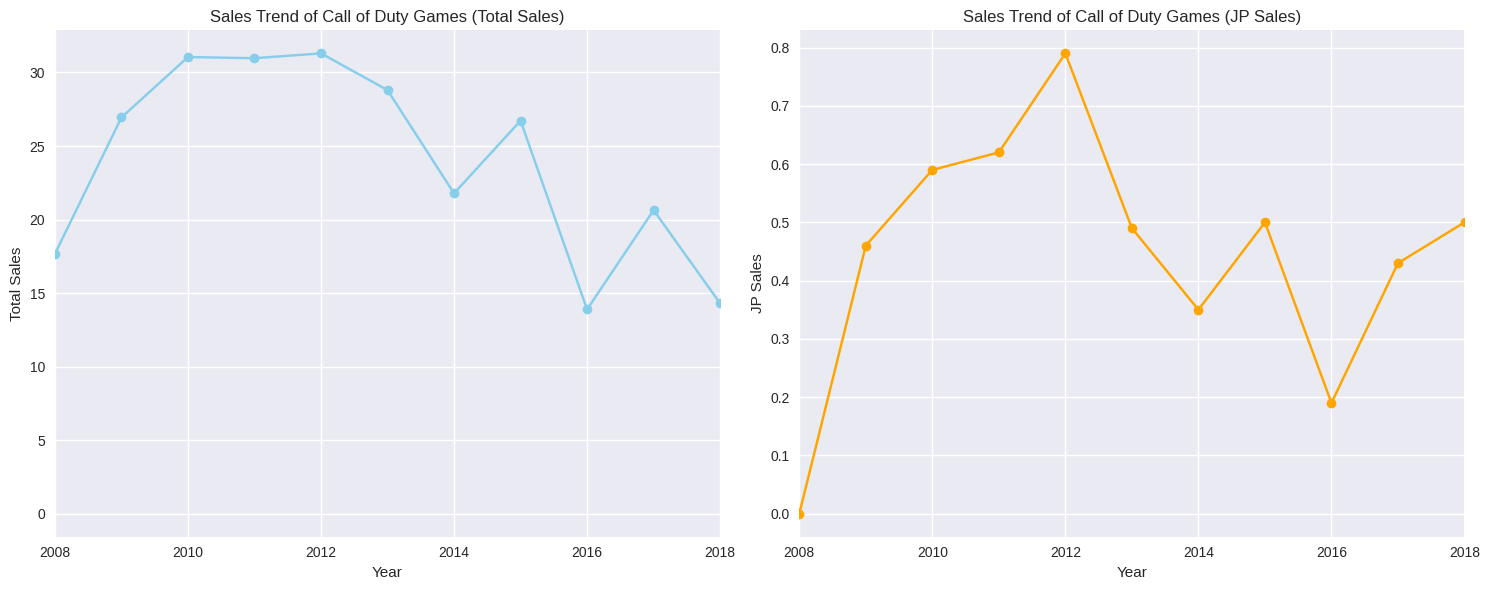

In [ ]:
# Filter the DataFrame for Call of Duty games
cod_games = df[df['title'].str.contains('Call of Duty')]

# Group the data by year and sum the total sales and JP sales for each year
yearly_cod_sales_total = cod_games.groupby('year')['total_sales'].sum()
yearly_cod_sales_jp = cod_games.groupby('year')['jp_sales'].sum()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot total sales trend
line1, = axes[0].plot(yearly_cod_sales_total, marker='o', color='skyblue')
axes[0].set_title('Sales Trend of Call of Duty Games (Total Sales)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Sales')
axes[0].grid(True)
axes[0].set_xlim([2008, 2018])
axes[0].legend(loc='best')
# Plot JP sales trend
line2, = axes[1].plot(yearly_cod_sales_jp, marker='o', color='orange')
axes[1].set_title('Sales Trend of Call of Duty Games (JP Sales)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('JP Sales')
axes[1].grid(True)
axes[1].set_xlim([2008, 2018])
axes[1].legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# Filtering the dataframe for Call of Duty games by Activision
cod_activision_df = df[(df['title'].str.contains('Call of Duty')) & (df['publisher'] == 'Activision')]

# Converting the release_date to datetime
cod_activision_df['release_date'] = pd.to_datetime(cod_activision_df['release_date'], errors='coerce')

# Sorting the dataframe by release_date
cod_activision_df = cod_activision_df.sort_values(by='release_date')

# Filtering the dataframe for entries from 2008 onward
filtered_cod_df_2008 = cod_activision_df[cod_activision_df['release_date'] >= '2008-01-01']

# Grouping by year and calculating the yearly total sales within each year for each region
filtered_cod_df_2008['year'] = filtered_cod_df_2008['release_date'].dt.year
yearly_sales_within_year_df = filtered_cod_df_2008.groupby('year')['total_sales'].sum().reset_index()
yearly_sales_na_df = filtered_cod_df_2008.groupby('year')['na_sales'].sum().reset_index()
yearly_sales_pal_df = filtered_cod_df_2008.groupby('year')['pal_sales'].sum().reset_index()
yearly_sales_japan_df = filtered_cod_df_2008.groupby('year')['jp_sales'].sum().reset_index()
yearly_sales_other_df = filtered_cod_df_2008.groupby('year')['other_sales'].sum().reset_index()

# Calculating the yearly rate of growth of yearly sales for each region
yearly_sales_within_year_df['yearly_sales_growth'] = yearly_sales_within_year_df['total_sales'].pct_change()
yearly_sales_na_df['yearly_sales_growth'] = yearly_sales_na_df['na_sales'].pct_change()
yearly_sales_pal_df['yearly_sales_growth'] = yearly_sales_pal_df['pal_sales'].pct_change()
yearly_sales_japan_df['yearly_sales_growth'] = yearly_sales_japan_df['jp_sales'].pct_change()
yearly_sales_other_df['yearly_sales_growth'] = yearly_sales_other_df['other_sales'].pct_change()

#plotly
trace_global = go.Scatter(x=yearly_sales_within_year_df['year'], y=yearly_sales_within_year_df['yearly_sales_growth'],
                          mode='lines+markers', name='Global')
trace_na = go.Scatter(x=yearly_sales_na_df['year'], y=yearly_sales_na_df['yearly_sales_growth'],
                      mode='lines+markers', name='North America')
trace_pal = go.Scatter(x=yearly_sales_pal_df['year'], y=yearly_sales_pal_df['yearly_sales_growth'],
                       mode='lines+markers', name='PAL')
trace_japan = go.Scatter(x=yearly_sales_japan_df['year'], y=yearly_sales_japan_df['yearly_sales_growth'],
                         mode='lines+markers', name='Japan')
trace_other = go.Scatter(x=yearly_sales_other_df['year'], y=yearly_sales_other_df['yearly_sales_growth'],
                         mode='lines+markers', name='Other')

# Create the figure
fig = go.Figure()

# Add the traces to the figure
fig.add_trace(trace_global)
fig.add_trace(trace_na)
fig.add_trace(trace_pal)
fig.add_trace(trace_japan)
fig.add_trace(trace_other)

# Update the layout
fig.update_layout(
    title='Yearly Rate of Growth of Yearly Sales for Call of Duty Games by Activision (2008 Onward)',
    xaxis_title='Year',
    yaxis_title='Yearly Rate of Growth of Sales',
    legend=dict(font=dict(size=12)),
    width=1000,
    height=600,
    xaxis=dict(range=[2009, 2019], tickmode='linear', dtick=1) # Set x-axis limits and ticks
)

# Show the plot
fig.show()

<ipython-input-29-fb5034b9a5a4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-fb5034b9a5a4>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1.rename(columns={'Date': 'release_date'}, inplace=True)
df1['release_date'] = pd.to_datetime(df1['release_date'])
# Merge the two DataFrames on the 'release_date' column
df_cod = df[df['title'].str.contains('Call of Duty')]

# Merge the two DataFrames
merged_df = pd.merge(df_cod, df1, on='release_date', how='inner')
merged_df.dropna(subset=['total_sales','na_sales','jp_sales','pal_sales','other_sales'],inplace = True)

In [ ]:
merged_df

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,year,Open,High,Low,Close,Adj Close,Volume
0,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2015,37.770000,37.770000,34.849998,35.000000,33.471169,20663200
1,Call of Duty: Black Ops 3,XOne,Shooter,Activision,Treyarch,NaN,7.37,4.63,0.02,2.04,0.68,2015-11-06,2015,37.770000,37.770000,34.849998,35.000000,33.471169,20663200
3,Call of Duty: Black Ops 3,PS3,Shooter,Activision,Treyarch,NaN,1.95,0.65,0.07,0.92,0.30,2015-11-06,2015,37.770000,37.770000,34.849998,35.000000,33.471169,20663200
5,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,2011,14.260000,14.400000,13.760000,13.930000,12.708136,26650000
6,Call of Duty: Modern Warfare 3,PS3,Shooter,Activision,Infinity Ward,8.8,13.35,5.54,0.49,5.78,1.54,2011-11-08,2011,14.260000,14.400000,13.760000,13.930000,12.708136,26650000
11,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,2010,11.970000,11.970000,11.660000,11.770000,10.577263,14223500
12,Call of Duty: Black Ops,PS3,Shooter,Activision,Treyarch,8.7,12.67,6.01,0.48,4.40,1.78,2010-11-09,2010,11.970000,11.970000,11.660000,11.770000,10.577263,14223500
17,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2012,10.710000,10.770000,10.560000,10.720000,9.920867,15461900
18,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2012,10.710000,10.770000,10.560000,10.720000,9.920867,15461900
19,Call of Duty Black Ops: Declassified,PSV,Shooter,Activision,Nihilistic,3.2,1.71,0.74,0.07,0.52,0.38,2012-11-13,2012,10.710000,10.770000,10.560000,10.720000,9.920867,15461900


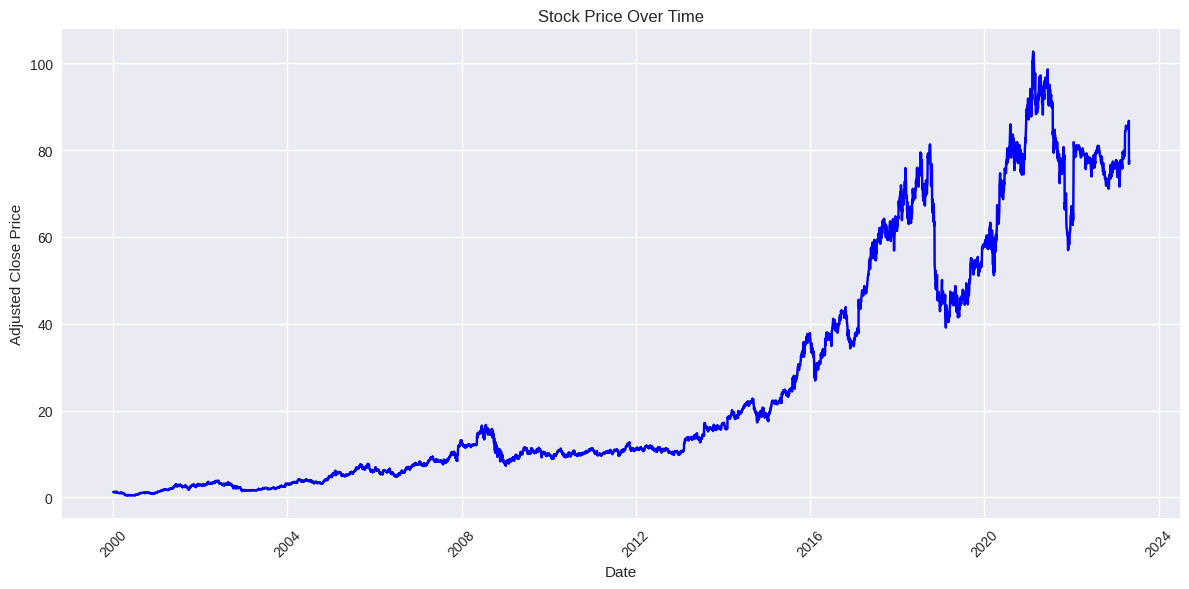

In [ ]:
import matplotlib.pyplot as plt

# Plotting the line chart
plt.figure(figsize=(12, 6))
# Use 'release_date' instead of 'Date'
plt.plot(df1['release_date'], df1['Adj Close'], color='blue', linestyle='-')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

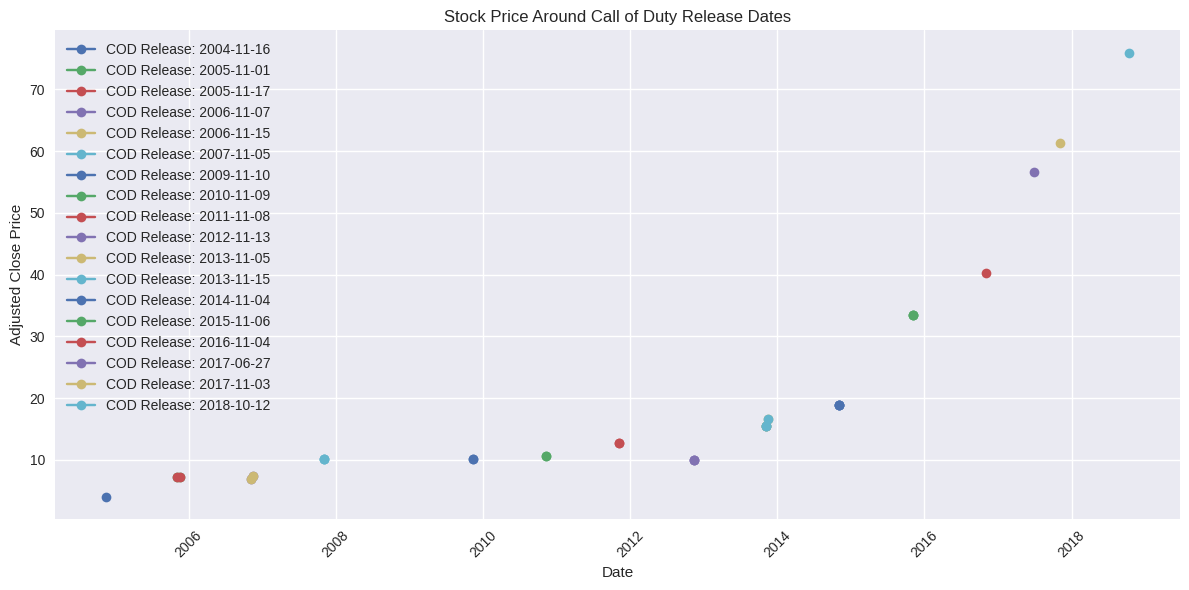

In [ ]:
# Convert 'release_date' column to datetime format
merged_df['release_date'] = pd.to_datetime(merged_df['release_date'])

# Get the unique release dates of Call of Duty games and sort them
cod_release_dates = sorted(merged_df['release_date'].dt.strftime('%Y-%m-%d').unique())

# Plotting the line chart
plt.figure(figsize=(12, 6))

# Plot the stock price around each Call of Duty release date
for release_date in cod_release_dates:
    # Convert release_date back to datetime format
    release_date_dt = pd.to_datetime(release_date)

    # Filter the stock data around the release date
    mask = (merged_df['release_date'] >= release_date_dt - pd.Timedelta(days=30)) & (merged_df['release_date'] <= release_date_dt + pd.Timedelta(days=30))
    stock_data = merged_df[mask]

    # Plot the stock price
    # Use 'stock_data' instead of 'stock_wdata'
    plt.plot(stock_data['release_date'], stock_data['Adj Close'], label=f'COD Release: {release_date_dt.strftime("%Y-%m-%d")}', marker='o')

plt.title('Stock Price Around Call of Duty Release Dates')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



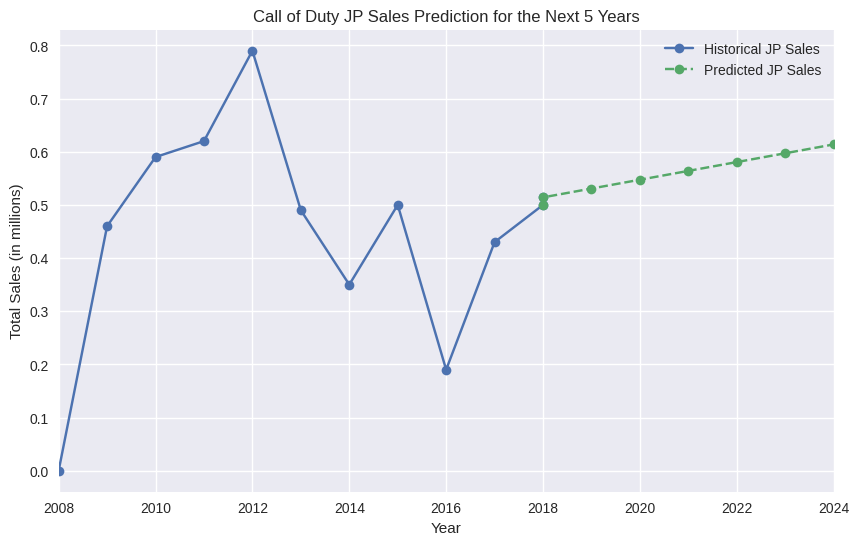

In [ ]:
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
#Filter the data for the years 2008 onward
cod_sales = cod_activision[(cod_activision['year'] > 2005) & (cod_activision['year'] <= 2018)].groupby('year')['jp_sales'].sum().reset_index()
cod_sales.rename(columns={'year': 'Year'}, inplace=True)


# Define features (X) and target variable (y)
X = cod_sales[['Year']]  # Features: Year
y = cod_sales['jp_sales'] # Target: JP Sales

model = LinearRegression()
model.fit(X, y)

# Predict the next 5 years (2018 to 2028)
future_years = np.arange(2018, 2025).reshape(-1, 1)
future_sales = model.predict(future_years)

#Combine historical data with predictions
future_df = pd.DataFrame({'Year': future_years.flatten(), 'jp_sales': future_sales})
pred_df = pd.concat([cod_sales, future_df])

#Separate historical data and predicted data
historical_data = pred_df[pred_df['Year'] <= 2018]
predicted_data = pred_df[pred_df['Year'] >= 2018]

plt.figure(figsize=(10, 6))

# Plot historical JP sales data
plt.plot(historical_data['Year'], historical_data['jp_sales'], marker='o', label='Historical JP Sales')

# Plot predicted JP sales data
plt.plot(predicted_data['Year'], predicted_data['jp_sales'], marker='o', linestyle='--', label='Predicted JP Sales')

# Add titles and labels
plt.title('Call of Duty JP Sales Prediction for the Next 5 Years')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend()
plt.grid(True)

# Limit the x-axis to 2008 onward
plt.xlim([2008, 2024])

# Show the plot
plt.show()

In [ ]:
cod_sales

,Year,jp_sales
0,2006,0.05
1,2007,0.42
2,2008,0.00
3,2009,0.46
4,2010,0.59
5,2011,0.62
6,2012,0.79
7,2013,0.49
8,2014,0.35
9,2015,0.50


Export to Google Sheet Report and Design a Tableau Dashboard**

In [ ]:
pip install pmdarima

ADF Statistic: -3.6814767376803434
p-value: 0.0043813743520465555
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6.560, Time=1.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=7.028, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1.531, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4.068, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19.657, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2.572, Time=0.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2.758, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4.551, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1.883, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 2.354 seconds
                               SARIMAX Results                                
Dep. Variable:               jp_sales   No. Observations:                   15
Model:                 ARIMA(1, 0, 0)   Log Likelihood                   1.808
Date:    

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



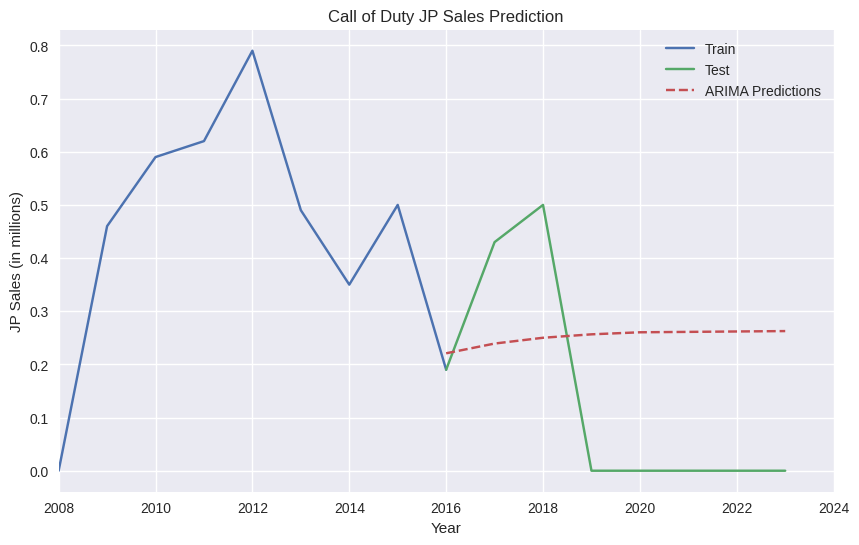

In [ ]:
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Sum JP sales by year
cod_sales = cod_activision.groupby('year')['jp_sales'].sum().reset_index()
cod_sales.rename(columns={'year': 'Year'}, inplace=True)

Check for stationarity
result = adfuller(cod_sales['jp_sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

Fit the ARIMA model using auto_arima to determine the best parameters
stepwise_fit = auto_arima(cod_sales['jp_sales'], trace=True, suppress_warnings=True)

Fit the ARIMA model on the entire dataset
model = ARIMA(cod_sales['jp_sales'], order=stepwise_fit.order)
model = model.fit()
print(model.summary())

 Make predictions for the entire period, including future forecasts
start = 0
end = len(cod_sales) + 5  # Assuming we want to forecast for the next 5 years
pred = model.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

# Extend the year range to include future years
years_extended = np.arange(cod_sales['Year'].min(), cod_sales['Year'].max() + 6)

# Ensure the prediction length matches the extended years
pred = pred[:len(years_extended)]


# Step 7: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train['Year'], train['jp_sales'], label='Train')
plt.plot(test['Year'], test['jp_sales'], label='Test')
plt.plot(test['Year'], pred, label='ARIMA Predictions', linestyle='--')
plt.title('Call of Duty JP Sales Prediction')
plt.xlabel('Year')
plt.ylabel('JP Sales (in millions)')
plt.legend()
plt.xlim([2008,2024])
plt.grid(True)
plt.show()

In [ ]:
# Mount to Google Sheets
from google.colab import auth
auth.authenticate_user()
# Import neccessary libraries
import gspread
from gspread_dataframe import set_with_dataframe
from google.auth import default
creds, _ = default()

# Authorize Google Sheets API
gc = gspread.authorize(creds)

In [ ]:
# ❗️This function helps create new worksheet
def export_data_to_new_sheet(gsheet_key, worksheet_name, data):
    sh = gc.open_by_key(gsheet_key)
    worksheet = sh.add_worksheet(worksheet_name, 1000, 26)
    set_with_dataframe(worksheet, data)

In [ ]:
# Notice! Replace the key by your google sheet key

#export_data_to_new_sheet('1yJvFlNZrpF9XVabTeLXq-VtfGuElnwiQjb-PCUUxXPg', 'salesperyear',sales_per_year )
#export_data_to_new_sheet('1yJvFlNZrpF9XVabTeLXq-VtfGuElnwiQjb-PCUUxXPg', 'saleperplatform',sales_per_platform.reset_index() )
#export_data_to_new_sheet('1yJvFlNZrpF9XVabTeLXq-VtfGuElnwiQjb-PCUUxXPg', '',yearly_sales_shooters_2008 )
#export_data_to_new_sheet('1yJvFlNZrpF9XVabTeLXq-VtfGuElnwiQjb-PCUUxXPg', '', )
#export_data_to_new_sheet('1yJvFlNZrpF9XVabTeLXq-VtfGuElnwiQjb-PCUUxXPg', '', )
#export_data_to_new_sheet('1yJvFlNZrpF9XVabTeLXq-VtfGuElnwiQjb-PCUUxXPg', '', )

,na_sales,jp_sales,pal_sales,other_sales
year,,,,
0,0.15,0.15,0.29,0.06
1985,0.42,0.28,0.10,0.02
1986,0.66,1.43,0.17,0.02
1987,0.99,0.89,0.14,0.02
1988,0.32,0.57,0.06,0.01
1989,3.38,0.31,0.44,0.04
1990,4.18,1.96,0.93,0.13
1991,0.32,0.25,0.05,0.01
1992,2.11,0.94,0.36,0.14
